## Long Short-Term Memory (LSTM)

Long Short-Term Memory (LSTM) is a special type of **Recurrent Neural Network (RNN)** designed to capture **long-term dependencies** in sequential data.  

It solves the **vanishing gradient problem** faced by traditional RNNs, enabling it to remember information over long sequences.

LSTMs introduce a **memory cell** that can **store, update, or forget information** using *gates*.  
These gates control the flow of information, allowing the network to keep relevant data and discard unnecessary details.

### LSTM Architecture

An LSTM cell contains:
1. **Cell State (`C_t`)**  
   - Acts as the long-term memory of the network.
   - Information flows through it with minor linear interactions.

2. **Hidden State (`h_t`)**  
   - Represents the short-term memory or current output at each time step.

3. **Gates**  
   Gates are sigmoid-activated layers (values between 0 and 1) that decide what to keep or discard:
   
   - **Forget Gate (`f_t`)**:  
     Decides which information from the previous cell state should be forgotten.  
     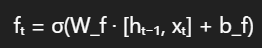
   
   - **Input Gate (`i_t`)**:  
     Controls how much new information to add to the cell state.  
    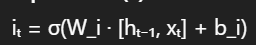
   
   - **Candidate Cell State (`\tilde{C_t}`)**:  
     Creates a new candidate memory to be added to the cell state.  
     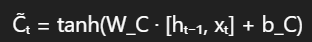
   
   - **Output Gate (`o_t`)**:  
     Determines how much of the cell state should influence the output.  
     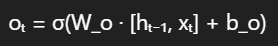

### Cell State Update
The cell state is updated using:

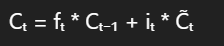

The hidden state is then:

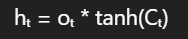

### Advantages of LSTM
- **Long-Term Memory**: Remembers patterns over long sequences.
- **Prevents Vanishing Gradient**: Stable training compared to traditional RNNs.
- **Handles Sequential Data**: Works well for time series, speech, and text.

### Applications of LSTM
- **Time Series Forecasting**: Stock prices, weather prediction, Bitcoin price forecasting.
- **Natural Language Processing (NLP)**: Text generation, sentiment analysis, machine translation.
- **Speech Recognition**: Converting speech to text.
- **Video Analysis**: Activity recognition in video streams.
- **Anomaly Detection**: Detecting unusual patterns in financial or sensor data.


### Key Takeaway
LSTMs excel at **capturing temporal dependencies** by selectively remembering or forgetting information through gates, making them ideal for problems involving **sequences** and **time-dependent data**.


### Long short-term memory (LSTM) RNN in Tensorflow

#### 1. Importing Libraries
In this step, we will import the necessary libraries like `pandas`, `numpy`, `matplotlib`, `scikit-learn` and `tensorflow`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#### 2. Data Loading, Preparing and Scaling
Here we are using a dataset of monthly milk production using LSTM.

- We load the dataset of monthly milk production. The `Date` column is converted to datetime format for time series analysis.
- We scale the data to a range of [0, 1] using `MinMaxScaler` to help the model train more effectively.

In [2]:
data = pd.read_csv('monthly_milk_production.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
production = data['Production'].astype(float).values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(production)

#### 3. Creating Sequences and Train-Test Split
Here we generate sequences of input data and split the dataset into training and testing sets.

- We use a sliding window of 12 months (1 year) of past data to predict the next month's production.
- The dataset is split into training and testing sets and reshaped to match the LSTM input shape.
- We split 80% data for training and 20% for testing purposes.

In [3]:
window_size = 12
X = []
y = []
target_dates = data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#### 4. Building the LSTM Model
This step involves defining and building the LSTM model architecture.

- The model consists of two LSTM layers, each with 128 units and a dropout layer after each to prevent overfitting.
- The model concludes with a Dense layer to predict a single value (next month's production).

In [4]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### 5. Training and Evaluating the Model
In this step, we train the model on the training data and evaluate its performance.

- The model is trained for 100 epochs using a batch size of 32, with 10% of the training data used for validation.
- After training the model is used to make predictions on the test set and we calculate the Root Mean Squared Error (RMSE) to evaluate performance.

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.1479 - val_loss: 0.0291
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0349 - val_loss: 0.0411
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0318 - val_loss: 0.0570
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0345 - val_loss: 0.0461
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0265 - val_loss: 0.0271
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0284 - val_loss: 0.0282
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0259 - val_loss: 0.0314
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0257 - val_loss: 0.0357
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0236 - val_loss: 0.0265
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0268 - val_loss: 0.0251
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0226 - val_loss: 0.0325
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0261 - val_l

Model trains for 100 epochs with a batch size of 32, using 10% of the training data for validation.

#### 6. Visualizing Model Performance
In this step, we visualize the actual vs predicted values. A plot is generated to compare the actual milk production against the predicted values, allowing us to evaluate how well the model performs over time.

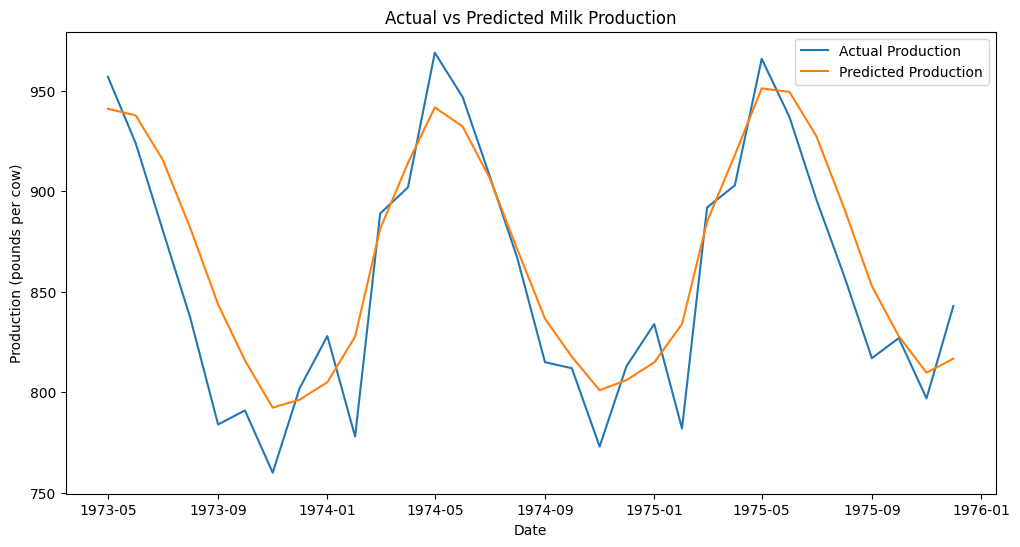

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label='Actual Production')
plt.plot(dates_test, predictions, label='Predicted Production')
plt.title('Actual vs Predicted Milk Production')
plt.xlabel('Date')
plt.ylabel('Production (pounds per cow)')
plt.legend()
plt.show()

The LSTM model successfully captures the trends and patterns in the time series data. As observed, the predicted values closely follow the actual values with small variations during transitions between peaks and lows. This demonstrates the effectiveness of LSTM for time series prediction tasks such as forecasting milk production.